# Fundamentals of Artificial Intelligence Programme (2024/25 Q1)
## Data Work 2

### Introduction
<!-- A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will evaluate the impact of incorrect labels on a number of different classifiers. -->
A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will explore a dataset that has missing data (null/NaN values) and fields in formats that are uninterpretable by machine learning models. By the end, you will have spent time learning how to handle messy data and how to apply simple machine learning strategies to such data, as well as see how poorly labelled data impacts the performance of such strategies.

We have provided a number of code snippets you can use during this assignment. Feel free to modify them or replace them.


### Dataset
The dataset you will be using is the [Adult Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). Remember to download this dataset from [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/500234/viewContent/2994354/View). This dataset was created by Ronny Kohavi and Barry Becker and was used to predict whether a person's income is more/less than 50k USD based on census data.

### Data preprocessing
Start by loading and preprocessing the data. Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14). You can read more on categorical data in Pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html), and more on encoding values [here](https://pbpython.com/categorical-encoding.html).

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import tree
from sklearn.kernel_approximation import RBFSampler


from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# %cd C:\Users\linth\PycharmProjects\FAIP

C:\Users\linth\PycharmProjects\FAIP


In [28]:
# Load the data set and split into X features and y target
data = pd.read_csv("data/adult_all.csv", na_values="?")
X = data.drop(columns=["target"])
data["target"] = data["target"].astype("category")
data["target"] = data["target"].cat.codes
y = data["target"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Data classification
Choose a [classifier](https://scikit-learn.org/stable/supervised_learning.html) and evaluate their performance in predicting the target variable.

#### Preprocessing
Think about how you are going to encode the categorical variables, whether you want to use all of the features or not. Justify your choices

A good method to apply preprocessing steps is using a Pipeline. Read more about this [here](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) and [here](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf).



In [45]:
# Preprocessing and making the pipeline
def preprocess_data(data):
    # Define the column indices or names for categorical and numerical columns
    categorical_columns = data.select_dtypes(include=["object"]).columns
    numerical_columns = data.select_dtypes(include=["int64"]).columns

    # Create the pipeline for each column type
    numeric = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),  # Replace missing values
            ("scaler", StandardScaler()),
        ]
    )

    categorical = Pipeline(
        steps=[
            (
                "imputer",
                SimpleImputer(strategy="constant", fill_value="missing"),
            ),  # Replace missing values
            ("encoder", OrdinalEncoder()),
        ]
    )

    # Create a preprocessing pipeline using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            (
                "cat",
                categorical,
                categorical_columns,
            ),  # Apply Ordinal Encoding to categorical columns
            (
                "num",
                numeric,
                numerical_columns,
            ),  # Apply scaling to numerical columns
        ]
    )

    return preprocessor

#### Evaluation
Use a metric from the lecture videos to evaluate the performance of the model.

In [53]:
# Testing different model performances
def test_models(preprocessor, X_train, y_train, X_test, y_test):
    # Three chosen models for testing
    classifiers = [AdaBoostClassifier(), GradientBoostingClassifier(), SGDClassifier()]

    performances = {}

    # For every model, apply preprocessor
    for classifier in classifiers:
        pipe = Pipeline(
            steps=[("preprocessor", preprocessor), ("classifier", classifier)]
        )

        # Fit the training data
        pipe.fit(X_train, y_train)

        # Make predictions
        y_pred = pipe.predict(X_test)

        # test model scores
        acc = accuracy_score(y_test, y_pred)

        performances[classifier] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "report": classification_report(y_test, y_pred, zero_division=np.nan),
        }

    return performances

In [54]:
preprocessor = (preprocess_data(data))
performances = test_models(preprocessor, X_train, y_train, X_test, y_test)
for model, metrics in performances.items():
        print(f"Model: {model}")
        print(f"Accuracy: {metrics['accuracy']}")
        print(f"Classification Report:\n{metrics['report']}")
        print("\n" + "=" * 50 + "\n")

Model: AdaBoostClassifier()
Accuracy: 0.8584297266864571
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7470
           1       0.76      0.59      0.66      2299

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Model: GradientBoostingClassifier()
Accuracy: 0.8659023441498618
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7470
           1       0.79      0.59      0.67      2299

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.79      9769
weighted avg       0.86      0.87      0.86      9769



Model: SGDClassifier()
Accuracy: 0.8105230832224384
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88 

#### Data visualization
Calculate the correlation between different features, including the target variable. Visualize the correlations in a heatmap. A good example of how to do this can be found [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec).

Select a features you think will be an important predictor of the target variable and one which is not important. Explain your answers.

In [55]:
# Code
data2 = data.copy()
data2.dropna()
data2[
    [
        "feature1",
        "feature3",
        "feature5",
        "feature6",
        "feature7",
        "feature8",
        "feature9",
        "feature13",
        "target",
    ]
] = data2[
    [
        "feature1",
        "feature3",
        "feature5",
        "feature6",
        "feature7",
        "feature8",
        "feature9",
        "feature13",
        "target",
    ]
].astype(
    "category"
)

data2[["employement_type", "graduation", "job", "etnicity", "gender", "country", "target_value"]] = data2[["feature1", "feature3", "feature6", "feature8", "feature9", "feature13", "target"]].apply(lambda x: x.cat.codes)
data_vis = data2[["employement_type", "graduation", "job", "etnicity", "gender", "country", "target_value"]].copy()

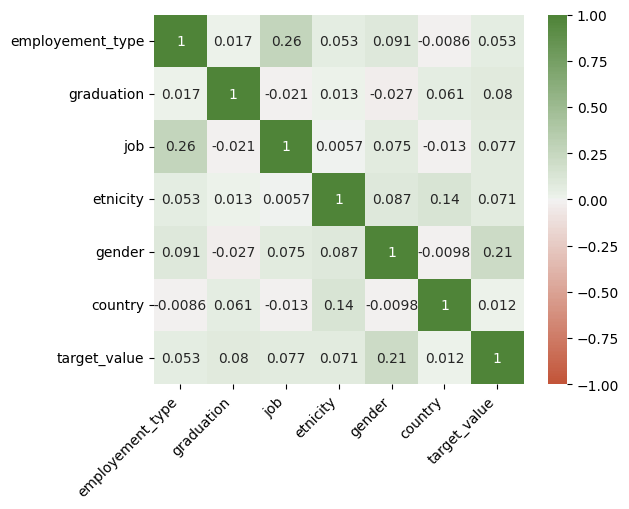

In [56]:

# visualizing function
def visualize(df):
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 120, n=200),
        square=True,
        annot=True
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")



visualize(data_vis)

### Label perturbation
To evaluate the impact of faulty labels in a dataset, we will introduce some errors in the labels of our data.


#### Preparation
Start by creating a method which alters a dataset by selecting a percentage of rows randomly and swaps labels from a 0->1 and 1->0.


In [58]:
import numpy as np
import random


def pertubate(y: np.ndarray, fraction: float) -> np.ndarray:
    copy = y.copy()  # Create a copy of the label vector

    # Calculate the number of labels to flip
    num_to_flip = int(fraction * len(y))

    # Get random indices for the labels to be flipped
    indices_to_flip = np.random.choice(len(y), size=num_to_flip, replace=False)

    # Flip the labels at the selected indices
    for idx in indices_to_flip:
        if copy[idx] == 0:
            copy[idx] = 1
        else:
            copy[idx] = 0

    return copy

#### Analysis
Create a number of new datasets with perturbed labels, for fractions ranging from `0` to `0.5` in increments of `0.1`.

Perform the same experiment you did before, which compared the performances of different models except with the new datasets. Repeat your experiment at least once for each model and perturbation level and calculate the mean and variance of the scores.

In [62]:
# Your code
def create_perturbed_datasets(y: np.ndarray) -> dict:
    fractions = np.arange(0, 0.6, 0.1)  # Fractions from 0.0 to 0.5 in steps of 0.1
    perturbed_datasets = {}

    for fraction in fractions:
        perturbed_labels = pertubate(y, fraction)
        perturbed_datasets[fraction] = perturbed_labels

    return perturbed_datasets


# Create perturbed datasets
y_train = y_train.reset_index(drop=True)
perturbed_datasets = create_perturbed_datasets(y_train)

In [60]:
def calculate_performance(preprocessor, pertubate_data, X_train, X_test, y_test):
    perturbed_performance = {}

    for fraction, perturbed_labels in pertubate_data.items():

        performances = test_models(
            preprocessor, X_train, perturbed_labels, X_test, y_test
        )
        perturbed_performance[fraction] = performances

    return perturbed_performance


pertubated_perf = calculate_performance(
    preprocessor, perturbed_datasets, X_train, X_test, y_test
)

Authors: Youri Arkesteijn, Tim van der Horst and Kevin Chong.

In [61]:
for fraction, performances in pertubated_perf.items():
    print(f"Perturbation Fraction: {fraction}")
    for model, metrics in performances.items():
        print(f"Model: {model}")
        print(f"Accuracy: {metrics['accuracy']}")
        print(f"Classification Report:\n{metrics['report']}")
        print("\n" + "=" * 50 + "\n")

Perturbation Fraction: 0.0
Model: AdaBoostClassifier()
Accuracy: 0.8584297266864571
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7470
           1       0.76      0.59      0.66      2299

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Model: GradientBoostingClassifier()
Accuracy: 0.8659023441498618
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7470
           1       0.79      0.59      0.67      2299

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.79      9769
weighted avg       0.86      0.87      0.86      9769



Model: SGDClassifier()
Accuracy: 0.7314975944313645
Classification Report:
              precision    recall  f1-score   support

           0     

### Final Thoughts

You may have noticed in your exploration that there are many different classification models. While it's not required we highly recommend repeating the exercises above with different classifiers and exploring the sklearn documentation to familiarize yourself with the many tools available.